# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The NSL_SIMULATOR code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progressive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid/gas phase MD simulations by re-starting them after such equilibration time.</span>

## SUBMISSION

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os

data_solid=np.loadtxt("./NSL_SIMULATOR/OUTPUT/solid/pressure.dat")
data_liquid=np.loadtxt("./NSL_SIMULATOR/OUTPUT/liquid/pressure.dat")
data_gas=np.loadtxt("./NSL_SIMULATOR/OUTPUT/gas/pressure.dat")
tdata_solid=np.loadtxt("./NSL_SIMULATOR/OUTPUT/solid/temperature.dat")
tdata_liquid=np.loadtxt("./NSL_SIMULATOR/OUTPUT/liquid/temperature.dat")
tdata_gas=np.loadtxt("./NSL_SIMULATOR/OUTPUT/gas/temperature.dat")

fin_solid=[]
err_solid=[]
fin_liquid=[]
err_liquid=[]
fin_gas=[]
err_gas=[]
tfin_solid=[]
terr_solid=[]
tfin_liquid=[]
terr_liquid=[]
tfin_gas=[]
terr_gas=[]
for i in range(len(data_solid)):
    fin_solid.append(data_solid[i][2])
    err_solid.append(data_solid[i][3])
    fin_liquid.append(data_liquid[i][2])
    err_liquid.append(data_liquid[i][3])
    fin_gas.append(data_gas[i][2])
    err_gas.append(data_gas[i][3])
    tfin_solid.append(tdata_solid[i][2])
    terr_solid.append(tdata_solid[i][3])
    tfin_liquid.append(tdata_liquid[i][2])
    terr_liquid.append(tdata_liquid[i][3])
    tfin_gas.append(tdata_gas[i][2])
    terr_gas.append(tdata_gas[i][3])


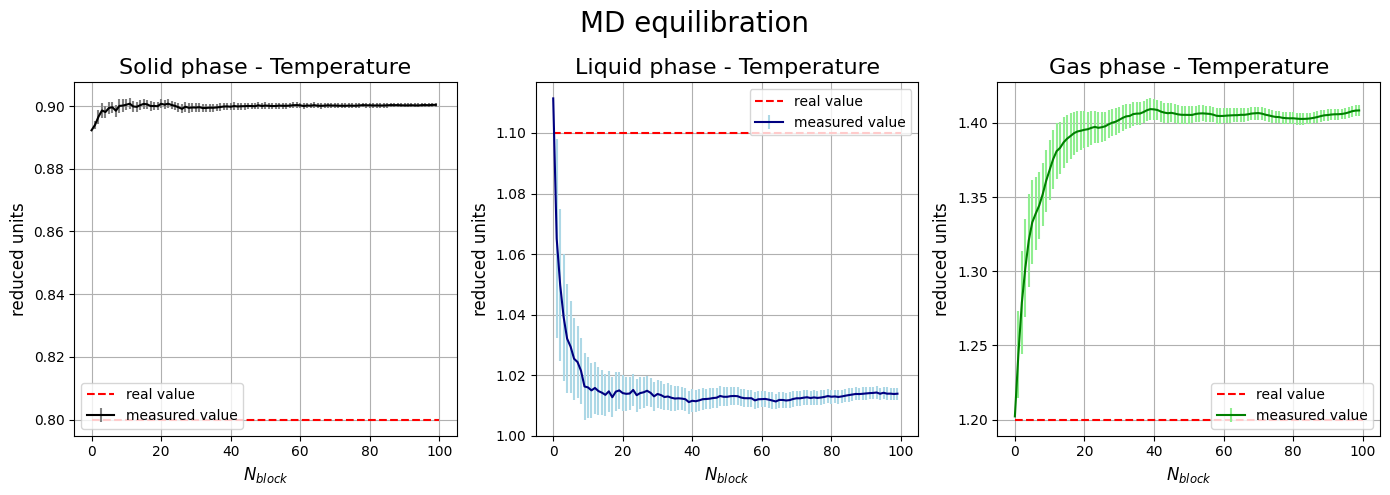

In [15]:
fig2=plt.figure(figsize=(14,5))
ax4=fig2.add_subplot(1,3,1)
ax4.errorbar(range(len(tfin_solid)),tfin_solid,yerr=terr_solid,c='black',ecolor='grey',label='measured value')
ax4.hlines(0.8,xmin=0,xmax=100,linestyles="--",color="red",label="real value")
ax4.set_ylabel(r"reduced units", fontsize=12)
ax4.set_xlabel(r"$N_{block}$",fontsize=12)
ax4.grid(True)
ax4.legend()
ax4.set_title("Solid phase - Temperature",fontsize=16)

ax5=fig2.add_subplot(1,3,2)
ax5.errorbar(range(len(tfin_liquid)),tfin_liquid,yerr=terr_liquid,c='navy',ecolor='lightblue',label='measured value')
ax5.hlines(1.1,xmin=0,xmax=100,linestyles="--",color="red",label="real value")
ax5.set_ylabel(r"reduced units", fontsize=12)
ax5.set_xlabel(r"$N_{block}$",fontsize=12)
ax5.grid(True)
ax5.legend()
ax5.set_title("Liquid phase - Temperature",fontsize=16)

ax6=fig2.add_subplot(1,3,3)
ax6.errorbar(range(len(tfin_gas)),tfin_gas,yerr=terr_gas,c='green',ecolor='lightgreen',label='measured value')
ax6.hlines(1.2,xmin=0,xmax=100,linestyles="--",color="red",label="real value")
ax6.set_ylabel(r"reduced units", fontsize=12)
ax6.set_xlabel(r"$N_{block}$",fontsize=12)
ax6.grid(True)
ax6.legend()
ax6.set_title("Gas phase - Temperature",fontsize=16)

plt.suptitle(r"MD equilibration",fontsize=20)
plt.tight_layout()
plt.show()

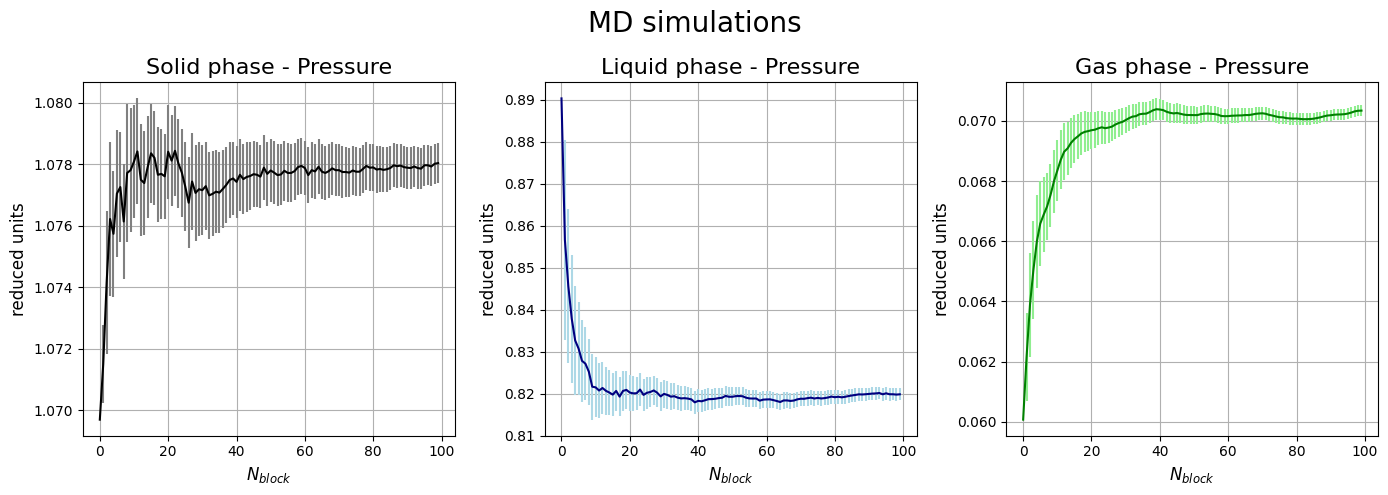

In [14]:
fig=plt.figure(figsize=(14,5))

ax1=fig.add_subplot(1,3,1)
ax1.errorbar(range(len(fin_solid)),fin_solid,yerr=err_solid,c='black',ecolor='grey')
ax1.set_ylabel(r"reduced units", fontsize=12)
ax1.set_xlabel(r"$N_{block}$",fontsize=12)
ax1.grid(True)
ax1.set_title("Solid phase - Pressure",fontsize=16)

ax2=fig.add_subplot(1,3,2)
ax2.errorbar(range(len(fin_liquid)),fin_liquid,yerr=err_liquid,c='navy',ecolor='lightblue')
ax2.set_ylabel(r"reduced units", fontsize=12)
ax2.set_xlabel(r"$N_{block}$",fontsize=12)
ax2.grid(True)
ax2.set_title("Liquid phase - Pressure",fontsize=16)

ax3=fig.add_subplot(1,3,3)
ax3.errorbar(range(len(fin_gas)),fin_gas,yerr=err_gas,c='green',ecolor='lightgreen')
ax3.set_ylabel(r"reduced units", fontsize=12)
ax3.set_xlabel(r"$N_{block}$",fontsize=12)
ax3.grid(True)
ax3.set_title("Gas phase - Pressure",fontsize=16)


plt.suptitle(r"MD simulations",fontsize=20)
plt.tight_layout()
plt.show()